In [1]:
#imported all the required lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
file_path = r'C:\Users\korra\OneDrive\Desktop\US\US Pathway Complete Data.xlsx'

phone_metrics_df = pd.read_excel(file_path, sheet_name='Phone Metrics')

print(phone_metrics_df.head())

### Dataset Overview
##### The dataset consists of approximately 30,000 rows and 21 columns, offering a substantial volume of data for analysis. This rich dataset provides a comprehensive view of the subject under study, allowing for in-depth exploration and meaningful insights.


In [ ]:
phone_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260623 entries, 0 to 260622
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   lead_number                   260623 non-null  int64         
 1   first_name                    260500 non-null  object        
 2   Lead Id                       193359 non-null  object        
 3   inbound_phone_call_counter    198996 non-null  float64       
 4   mobile_number                 1109 non-null    float64       
 5   outbound_phone_call_counter   223077 non-null  float64       
 6   lead_stage                    260414 non-null  object        
 7   lead_score                    260623 non-null  int64         
 8   owner                         260623 non-null  object        
 9   activity                      260623 non-null  object        
 10  date_of_call                  260623 non-null  datetime64[ns]
 11  status       

### DATA CLEANING & Transformation

In [ ]:
#Replacing all the null lead_id to null
phone_metrics_df['Lead Id'].fillna('Unknown', inplace=True)
#Checking if the values in the lead_id are null or not
updated_null_count =phone_metrics_df['Lead Id'].isnull().sum()
print(updated_null_count )

0


In [ ]:
#Converting the datatypes of the columns
phone_metrics_df['inbound_phone_call_counter'] = phone_metrics_df['inbound_phone_call_counter'].fillna(0).astype(int)
phone_metrics_df['outbound_phone_call_counter'] = phone_metrics_df['outbound_phone_call_counter'].fillna(0).astype(int)

phone_metrics_df['mobile_number'] = phone_metrics_df['mobile_number'].fillna(0).astype(int)

In [ ]:
#Based on the activity column trying to update the inbound_phone_call_counter and outbound_phone_call_counter
phone_metrics_df.loc[phone_metrics_df['activity'] == 'Inbound Phone Call Activity', 'inbound_phone_call_counter'] += 1
phone_metrics_df.loc[phone_metrics_df['activity'] == 'Outbound Phone Call Activity', 'outbound_phone_call_counter'] += 1

print(phone_metrics_df)

        lead_number        first_name             Lead Id  \
0           2704878            Pranav   l:861701659054416   
1           2288584      Ramakrishnan   l:966563021758786   
2           2721420   Purnima kuppala   l:430457079653387   
3            693703            Sambit             Unknown   
4           2712125     Gokul Krishna  l:1547362259166875   
...             ...               ...                 ...   
260618       703645     Shruti Mathur             Unknown   
260619      2704878            Pranav   l:861701659054416   
260620      2293137      Divya Shukla  l:3609611255969786   
260621      2293667    Dev Bhandarker  l:8106492436034710   
260622      2293838  Shaik Zainnuddin  l:1816060162176982   

        inbound_phone_call_counter  mobile_number  \
0                                1              0   
1                                0              0   
2                                1              0   
3                                0              0   
4 

In [ ]:
#trying to replace the values of the Sales_squad null values to Individual
phone_metrics_df['sales_squad'] = phone_metrics_df['sales_squad'].fillna('Individual')
#Also in squad_role if the value is null tried to replace that with marketing team
phone_metrics_df['squad_role'] = phone_metrics_df['squad_role'].fillna('marketing team')
#lead stange if its null replacing that with null
phone_metrics_df['lead_stage'] = phone_metrics_df['lead_stage'].fillna('Unknown')
#Also updating the first_name null values to unknown
phone_metrics_df['first_name'] = phone_metrics_df['first_name'].fillna('Unknown')

In [ ]:
# Drop the contacted,calls_done_by2,call_time,new_followup,calls_done_by_without_spaces,mobile_number columns
phone_metrics_df.drop(columns=['contacted'], inplace=True)
phone_metrics_df.drop(columns=['calls_done_by2'], inplace=True)
phone_metrics_df.drop(columns=['calls_done_by_without_spaces'], inplace=True)
phone_metrics_df.drop(columns=['call_time'], inplace=True)
phone_metrics_df.drop(columns=['new_followup'], inplace=True)
phone_metrics_df = phone_metrics_df.drop(columns=['mobile_number'])

### EDA

##### TIME SERIES ANALYSIS

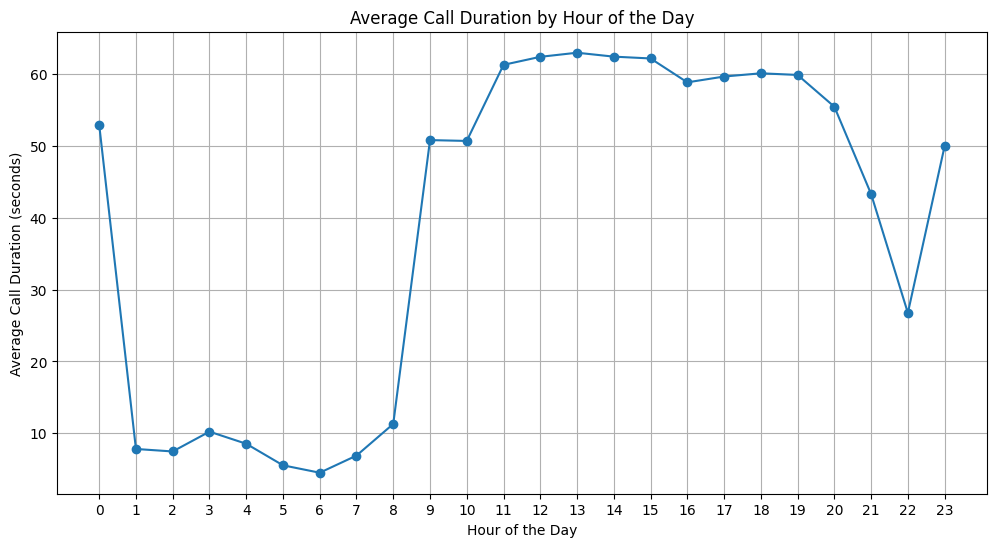

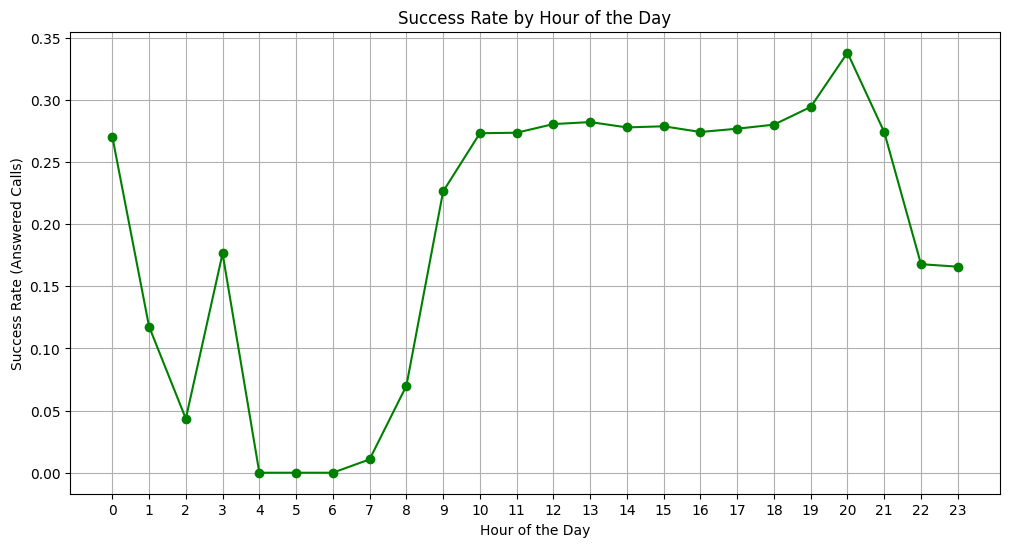

In [ ]:
#Used to extract the convert the datatime object for easy extraction
phone_metrics_df['date_of_call'] = pd.to_datetime(phone_metrics_df['date_of_call'])

# Extract the hour from call_time
phone_metrics_df['call_hour'] = phone_metrics_df['date_of_call'].dt.hour
hourly_performance = phone_metrics_df.groupby('call_hour').agg({
    'call_duration_sec': ['mean', 'sum', 'count'],
    'lead_score': 'mean',
    #rate, defined as the proportion of calls that were answered out of the total calls made for each hour.
    'status': lambda x: (x == 'Answered').sum() / x.count()  # Success rate (answered calls)
}).reset_index()
#reset index is used to convert the grouped DataFrame back to regular
# Flatten multi-level columns
hourly_performance.columns = ['call_hour', 'avg_call_duration_sec', 'total_call_duration_sec', 'total_calls', 'avg_lead_score', 'success_rate']

#Graph for Avg call duration
plt.figure(figsize=(12, 6))
plt.plot(hourly_performance['call_hour'], hourly_performance['avg_call_duration_sec'], marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Call Duration (seconds)')
plt.title('Average Call Duration by Hour of the Day')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()
#Graph for Success rate
plt.figure(figsize=(12, 6))
plt.plot(hourly_performance['call_hour'], hourly_performance['success_rate'], marker='o', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Success Rate (Answered Calls)')
plt.title('Success Rate by Hour of the Day')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

Insights
- Engagement Patterns: Based on the average call duration, it is evident that there is higher engagement between 8 AM and 9 PM. This suggests that this time frame is optimal for reaching out to contacts.
- Preferred Call Times: Analyzing the success rate of answered calls, we can infer that 8 AM to 9 PM is the preferred time for making calls, as calls made during these hours are more likely to be answered.

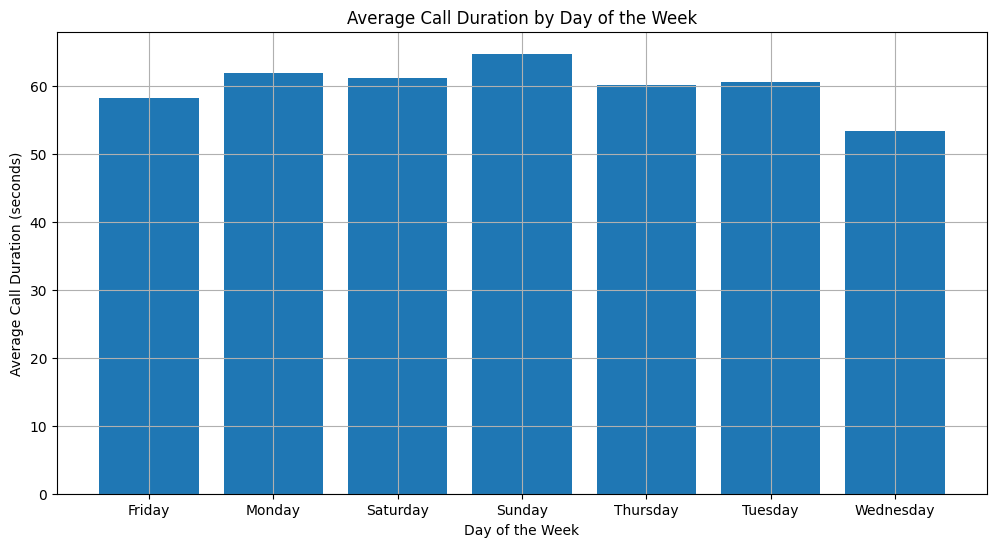

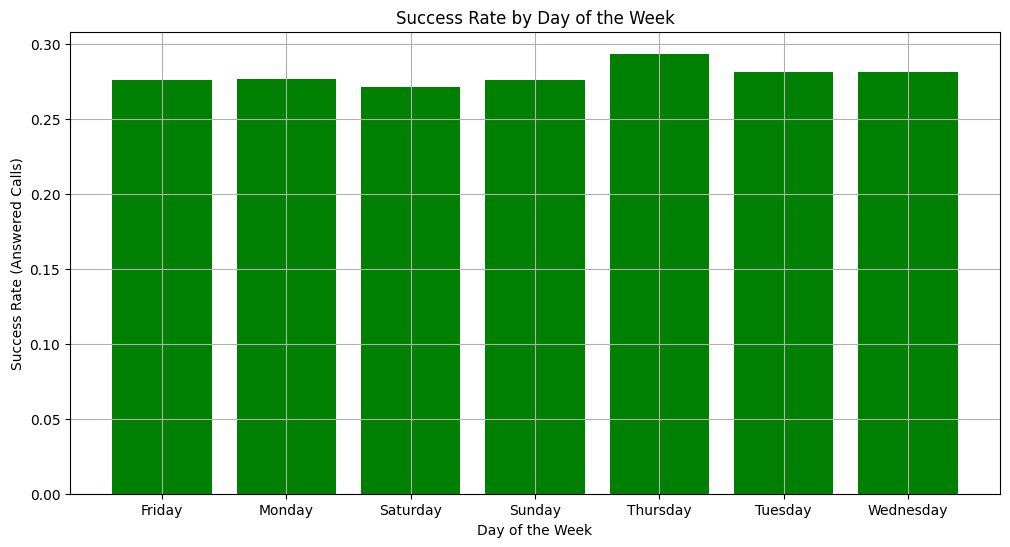

In [ ]:
# Extract the day of the week from the call time
phone_metrics_df['call_day'] = phone_metrics_df['date_of_call'].dt.day_name()

# Aggregate metrics by day of the week
day_performance = phone_metrics_df.groupby('call_day').agg({
    'call_duration_sec': ['mean', 'sum', 'count'],
    'lead_score': 'mean',
    'status': lambda x: (x == 'Answered').sum() / x.count()
}).reset_index()

# Flatten multi-level columns
day_performance.columns = ['call_day', 'avg_call_duration_sec', 'total_call_duration_sec', 'total_calls', 'avg_lead_score', 'success_rate']
plt.figure(figsize=(12, 6))
plt.bar(day_performance['call_day'], day_performance['avg_call_duration_sec'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Call Duration (seconds)')
plt.title('Average Call Duration by Day of the Week')
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
plt.bar(day_performance['call_day'], day_performance['success_rate'], color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Success Rate (Answered Calls)')
plt.title('Success Rate by Day of the Week')
plt.grid(True)
plt.show()

Insights
- Preferred Day for Calls: Analysis of average call durations indicates that Sunday is slightly more preferred for longer conversations, though the difference compared to other days is minimal.
- Answered Call Rates: When looking at the answered call rate, Thursday stands out as the preferred day, with a higher likelihood of calls being answered compared to other weekdays.

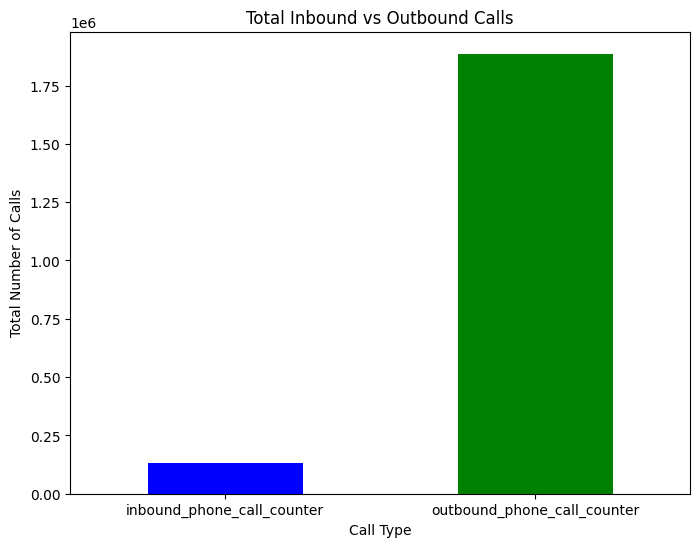

In [ ]:
call_frequency = phone_metrics_df[['inbound_phone_call_counter', 'outbound_phone_call_counter']].sum()

plt.figure(figsize=(8, 6))
call_frequency.plot(kind='bar', color=['blue', 'green'])
plt.title('Total Inbound vs Outbound Calls')
plt.xlabel('Call Type')
plt.ylabel('Total Number of Calls')
plt.xticks(rotation=0)
plt.show()

Insight-
Inbound vs. Outbound Calls: The majority of calls are outbound, indicating that the company predominantly initiates contact to follow up with candidates.

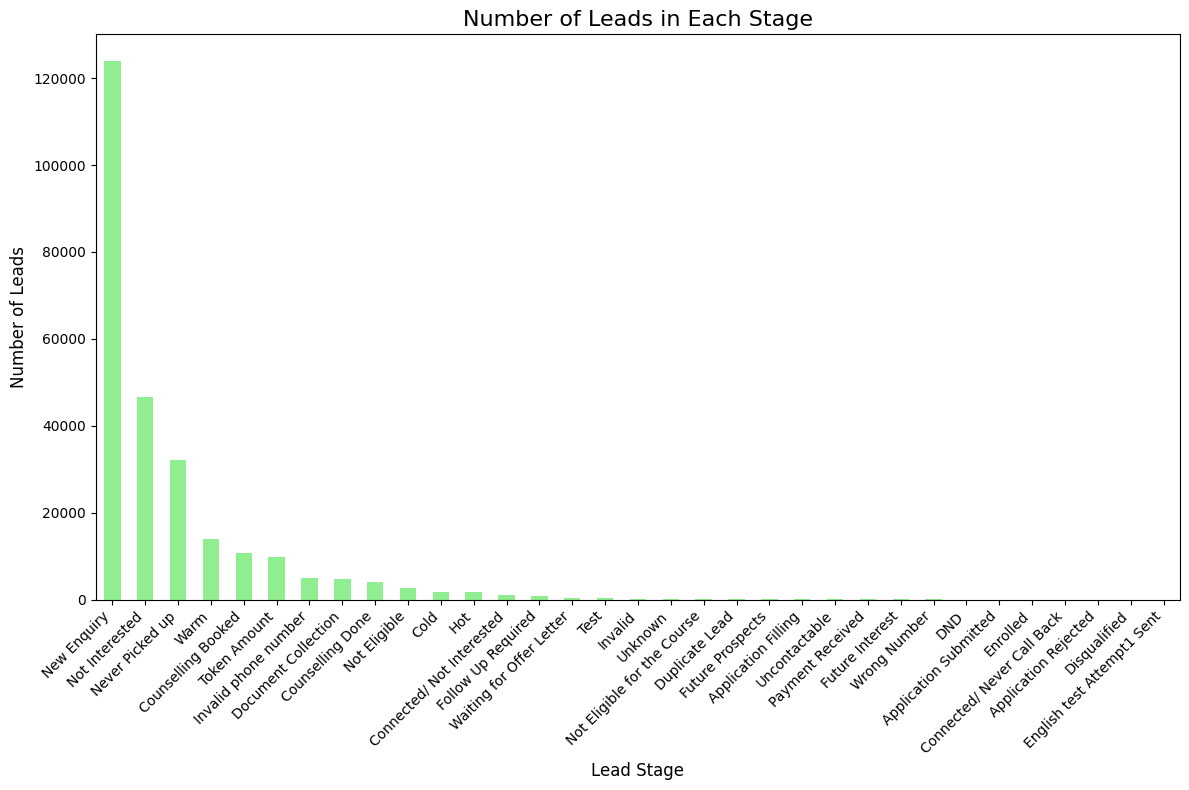

In [ ]:
# Count the number of leads in each stage
lead_stage_distribution = phone_metrics_df['lead_stage'].value_counts()

# Create the plot with improved readability
plt.figure(figsize=(12, 8))
lead_stage_distribution.plot(kind='bar', color='lightgreen')

# Add titles and labels
plt.title('Number of Leads in Each Stage', fontsize=16)
plt.xlabel('Lead Stage', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)

# Rotate x-ticks for better readability and adjust layout
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

Insight-
Lead Stage Distribution: The analysis of the number of leads in each stage shows that the New Inquiry stage has the highest volume of leads, indicating that a significant number of people are entering the funnel at this initial stage.

In [ ]:
final_stage_count = phone_metrics_df[phone_metrics_df['lead_stage'] == 'Payment Received'].shape[0]
total_leads = phone_metrics_df.shape[0]
conversion_rate = final_stage_count / total_leads
print(f'Conversion Rate: {conversion_rate:.2%}')

Conversion Rate: 0.02%


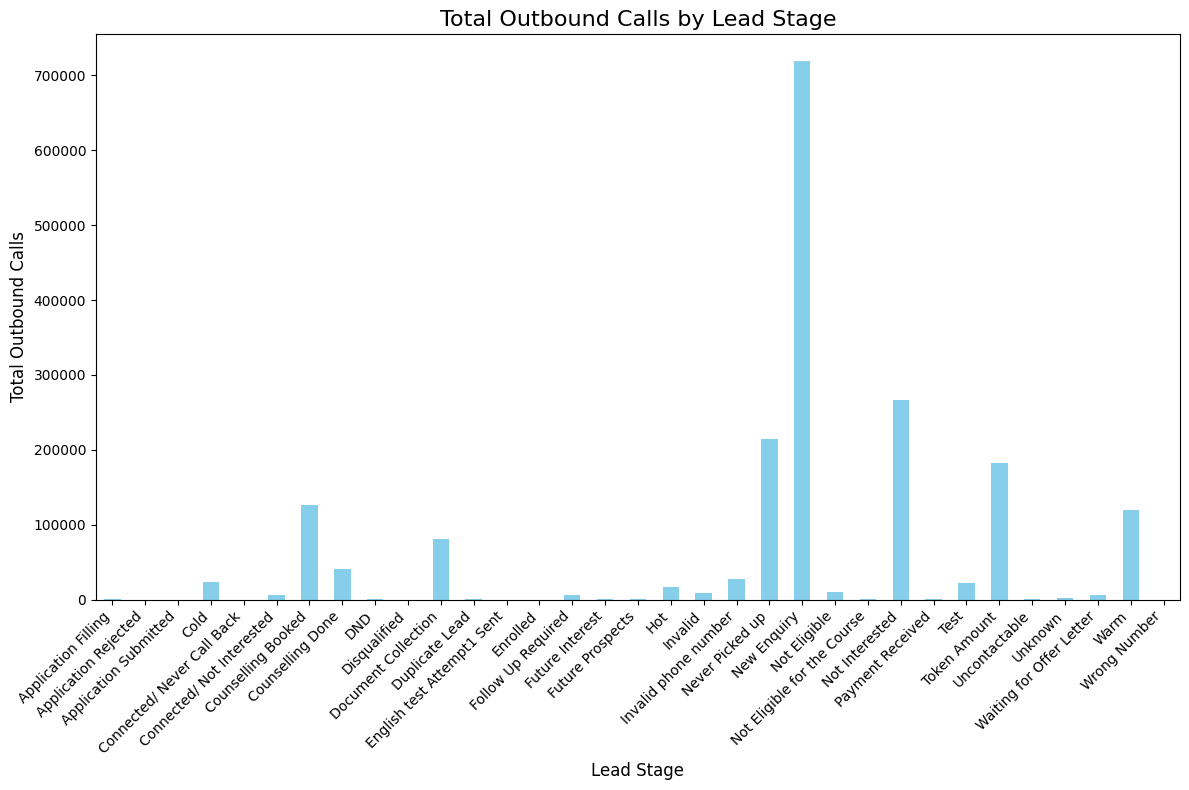

In [ ]:
outbound_calls_by_stage = phone_metrics_df.groupby('lead_stage')['outbound_phone_call_counter'].sum()

plt.figure(figsize=(12, 8))
outbound_calls_by_stage.plot(kind='bar', color='skyblue')

# Titles and labels
plt.title('Total Outbound Calls by Lead Stage', fontsize=16)
plt.xlabel('Lead Stage', fontsize=12)
plt.ylabel('Total Outbound Calls', fontsize=12)

# Rotating x-ticks and adjusting layout
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Displaying the plot
plt.show()

Insight-
Outbound Call Focus: The majority of outbound calls are directed toward candidates in the New Inquiry stage, suggesting that initial follow-ups are a key focus for the company.

In [ ]:
conversion_with_calls = phone_metrics_df[phone_metrics_df['lead_stage'] == 'Payment Received']['outbound_phone_call_counter'].mean()
print(f'Average Outbound Calls for Converted Leads: {conversion_with_calls:.2f}')

Average Outbound Calls for Converted Leads: 19.77


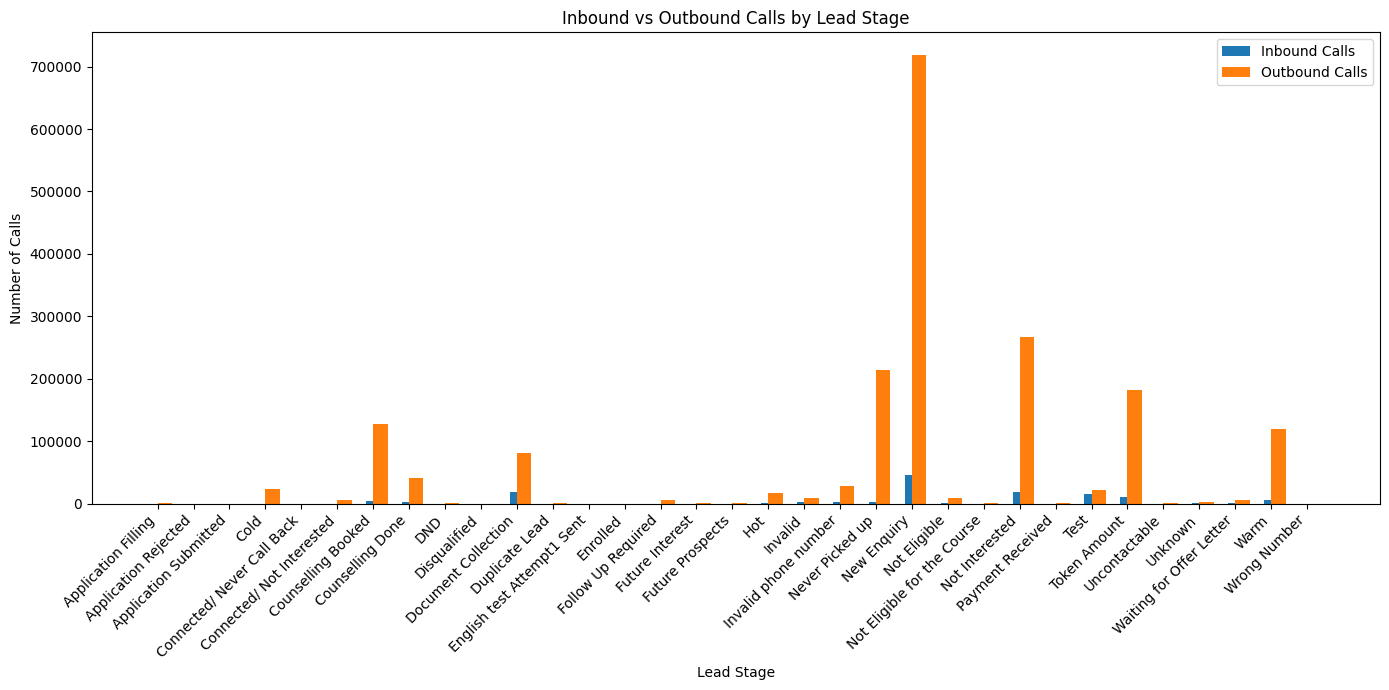

In [ ]:
call_counts = phone_metrics_df.groupby('lead_stage').agg({
    'inbound_phone_call_counter': 'sum',
    'outbound_phone_call_counter': 'sum'
}).reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(14, 7))

# Plotting inbound calls
plt.bar(call_counts['lead_stage'], call_counts['inbound_phone_call_counter'], width=0.4, label='Inbound Calls', align='center')

# Plotting outbound calls, shifting the bars to the right
plt.bar(call_counts['lead_stage'], call_counts['outbound_phone_call_counter'], width=0.4, label='Outbound Calls', align='edge')

# Adding labels and title
plt.xlabel('Lead Stage')
plt.ylabel('Number of Calls')
plt.title('Inbound vs Outbound Calls by Lead Stage')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Insight - 
Call Distribution by Stage: Analysis of outbound versus inbound calls across different stages reveals that the New Inquiry stage not only has the highest number of outbound calls but also leads in inbound calls, highlighting the stage's critical role in candidate communication.

### Sales Squad Analysis

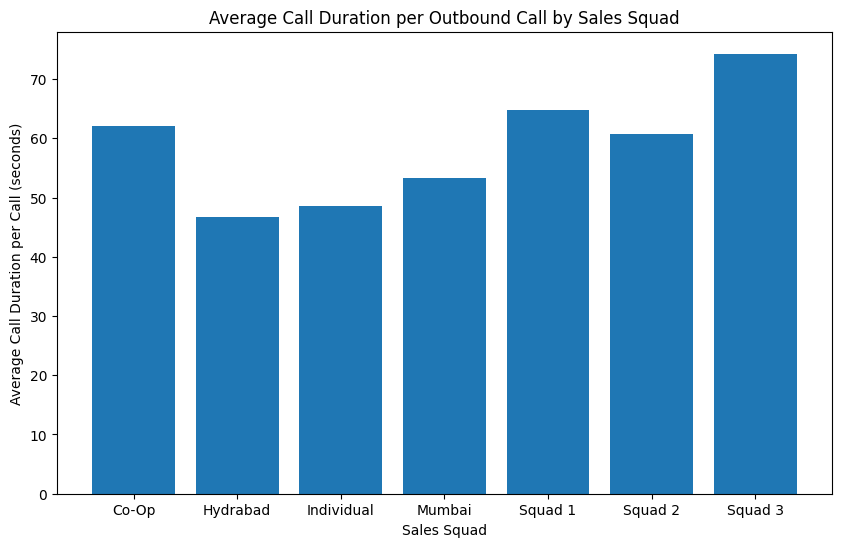

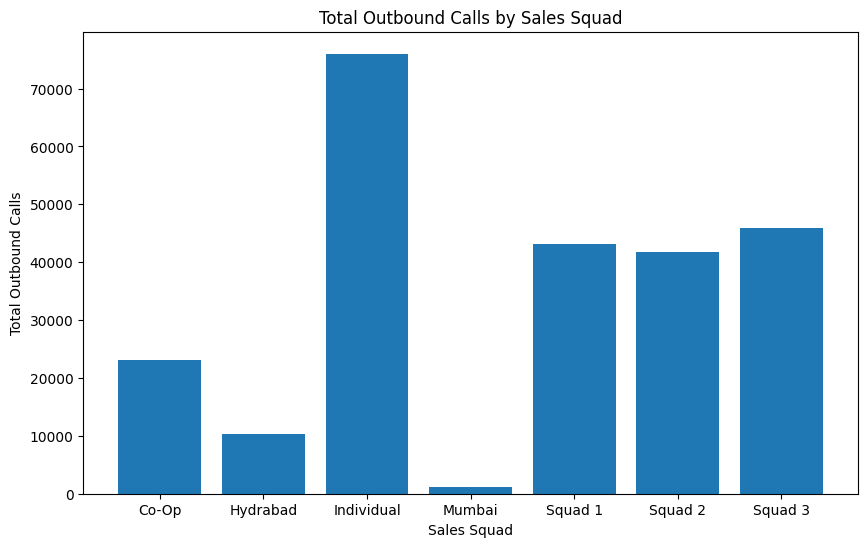

In [ ]:
outbound_data = phone_metrics_df[phone_metrics_df['activity'] == 'Outbound Phone Call Activity']

# Check the filtered data

squad_performance = outbound_data.groupby('sales_squad').agg({
    'call_duration_sec': ['mean', 'sum', 'count']
}).reset_index()

# Flatten multi-level columns
squad_performance.columns = ['sales_squad', 'avg_call_duration_sec', 'total_call_duration_sec', 'total_outbound_calls']


squad_performance['avg_call_duration_per_call'] = squad_performance['total_call_duration_sec'] / squad_performance['total_outbound_calls']


plt.figure(figsize=(10, 6))
plt.bar(squad_performance['sales_squad'], squad_performance['avg_call_duration_per_call'])
plt.xlabel('Sales Squad')
plt.ylabel('Average Call Duration per Call (seconds)')
plt.title('Average Call Duration per Outbound Call by Sales Squad')
plt.show()

# Bar plot for total outbound calls by squad
plt.figure(figsize=(10, 6))
plt.bar(squad_performance['sales_squad'], squad_performance['total_outbound_calls'])
plt.xlabel('Sales Squad')
plt.ylabel('Total Outbound Calls')
plt.title('Total Outbound Calls by Sales Squad')
plt.show()

Insights
- Average Call Duration: Based on the average call duration, Squad 3 is performing well, indicating effective and possibly longer engagement with contacts.
- Call Success Rate: The analysis of successful call answering shows that an individual is excelling in their performance, achieving a higher rate of answered calls compared to others.

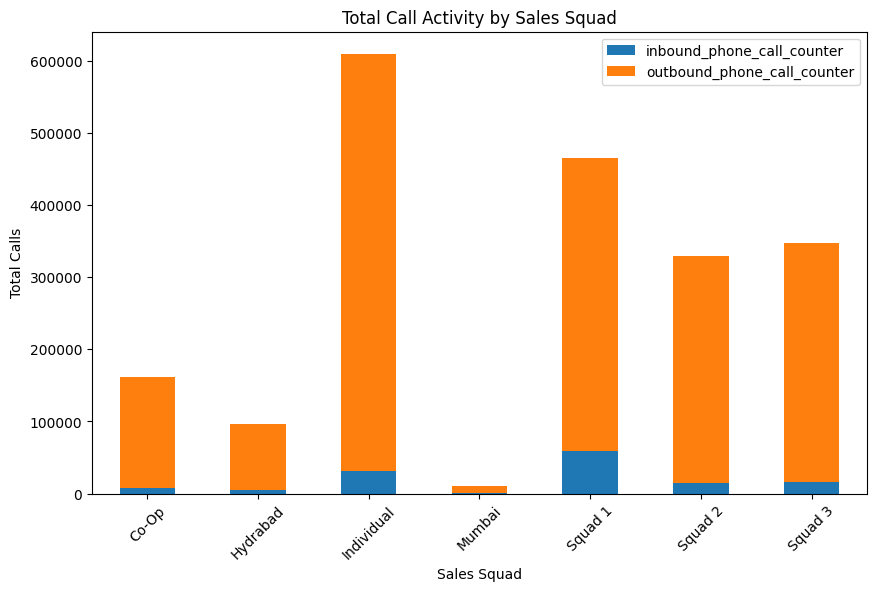

In [ ]:
call_activity_by_squad = phone_metrics_df.groupby('sales_squad')[['inbound_phone_call_counter', 'outbound_phone_call_counter']].sum()

call_activity_by_squad.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Call Activity by Sales Squad')
plt.xlabel('Sales Squad')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.show()

Insight - 
Call Distribution by Sales Squad: The total number of inbound and outbound calls reveals that the individual has conducted the highest number of outbound calls, while Squad 1 has received the most inbound calls, highlighting distinct strengths in call handling across the teams.

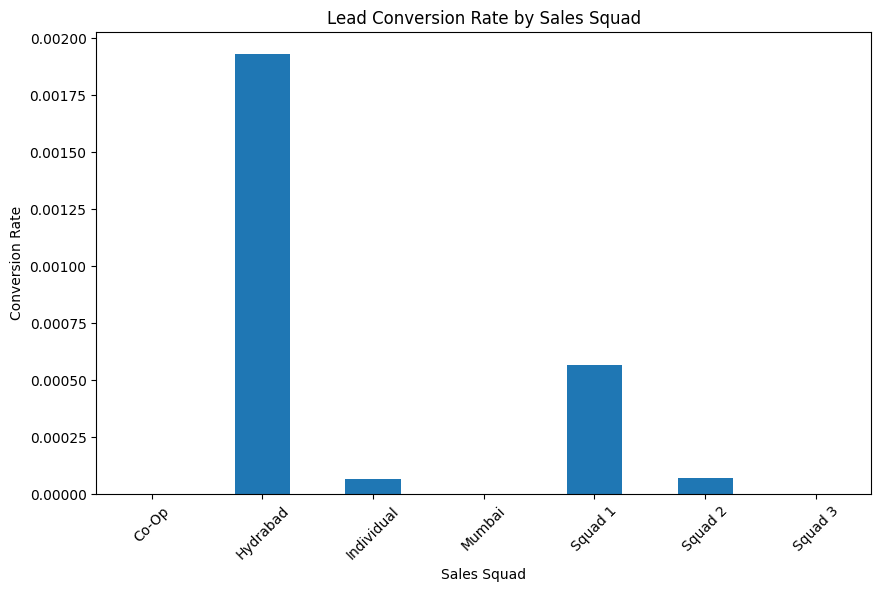

In [ ]:
conversion_by_squad = phone_metrics_df[phone_metrics_df['lead_stage'] == 'Payment Received'].groupby('sales_squad').size() / phone_metrics_df.groupby('sales_squad').size()

plt.figure(figsize=(10, 6))
conversion_by_squad.plot(kind='bar')
plt.title('Lead Conversion Rate by Sales Squad')
plt.xlabel('Sales Squad')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

Insight
Payment Process Success Rate by Squad: The success rate of completing the payment process varies across squads, providing insights into each squad's effectiveness in finalizing transactions.

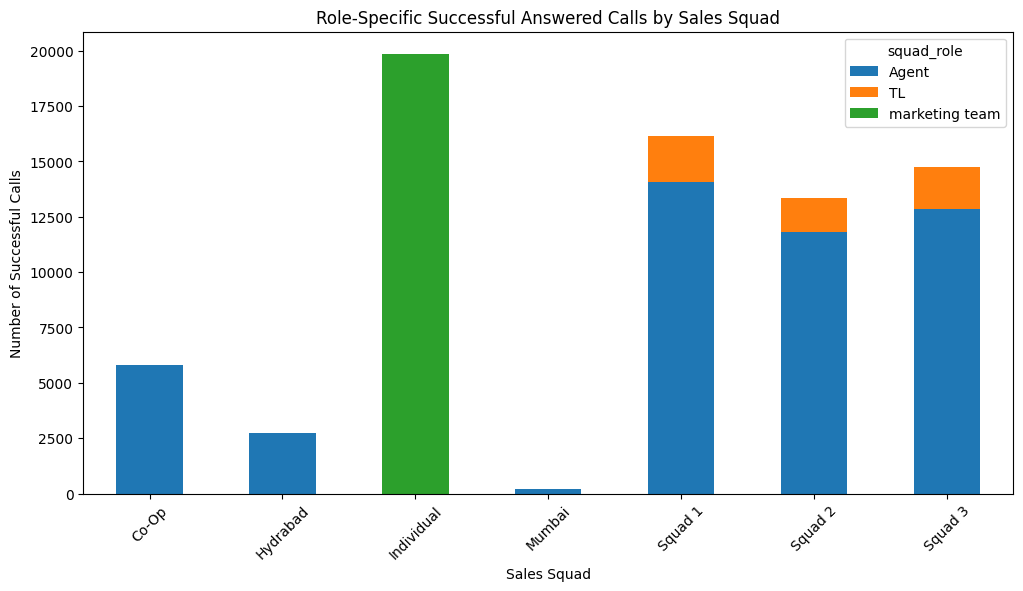

In [ ]:
successful_calls = phone_metrics_df[phone_metrics_df['status'] == 'Answered'].groupby(['sales_squad', 'squad_role']).size().unstack()

successful_calls.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Role-Specific Successful Answered Calls by Sales Squad')
plt.xlabel('Sales Squad')
plt.ylabel('Number of Successful Calls')
plt.xticks(rotation=45)
plt.show()

Insight - 
Marketing Distribution: The Individual marketing team has issued a significant amount of marketing materials, with Squad 1 agents following closely behind. This indicates a strong emphasis on marketing efforts by both the individual team and Squad 1.

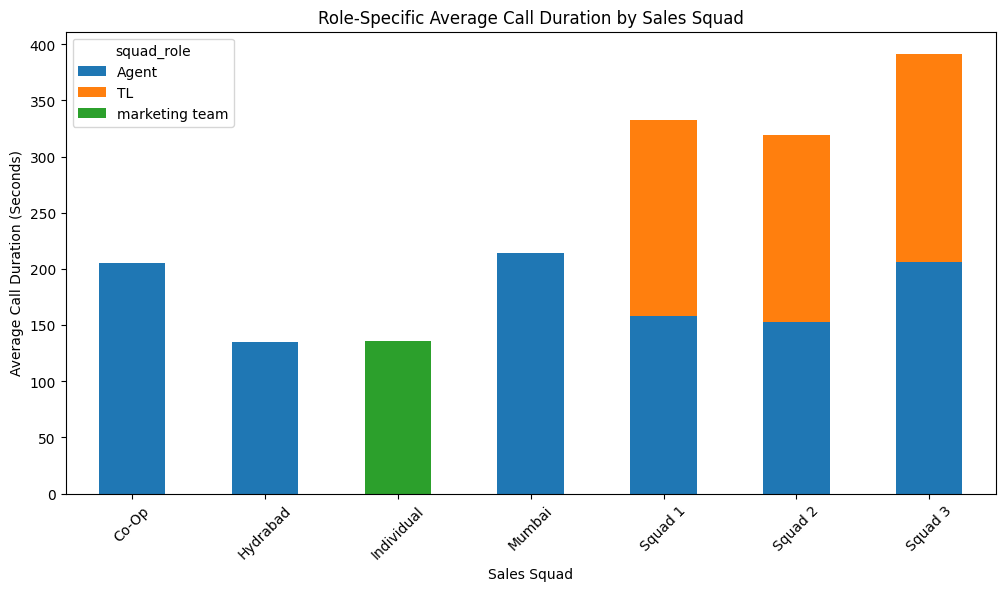

In [ ]:
# Calculate the average call duration (in seconds) for each role in each sales squad
avg_call_duration = phone_metrics_df[phone_metrics_df['status'] == 'Answered'].groupby(['sales_squad', 'squad_role'])['call_duration_sec'].mean().unstack()

avg_call_duration.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Role-Specific Average Call Duration by Sales Squad')
plt.xlabel('Sales Squad')
plt.ylabel('Average Call Duration (Seconds)')
plt.xticks(rotation=45)
plt.show()


Insight
Call Duration Management: Squad 3 manages the longest call durations, with key roles such as Team Lead and Agent contributing significantly to this performance.

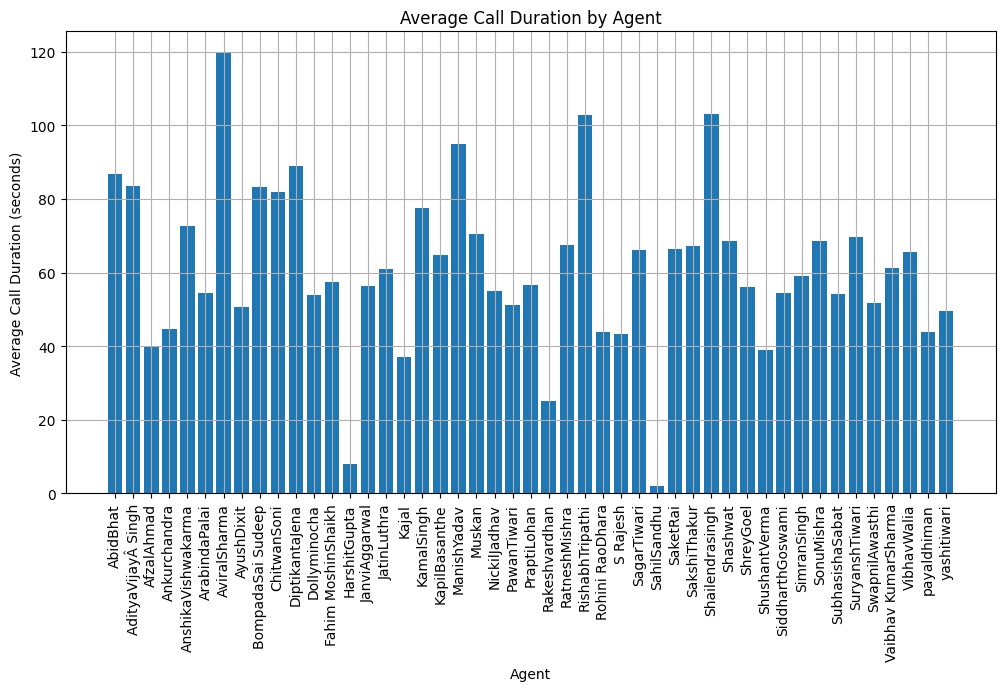

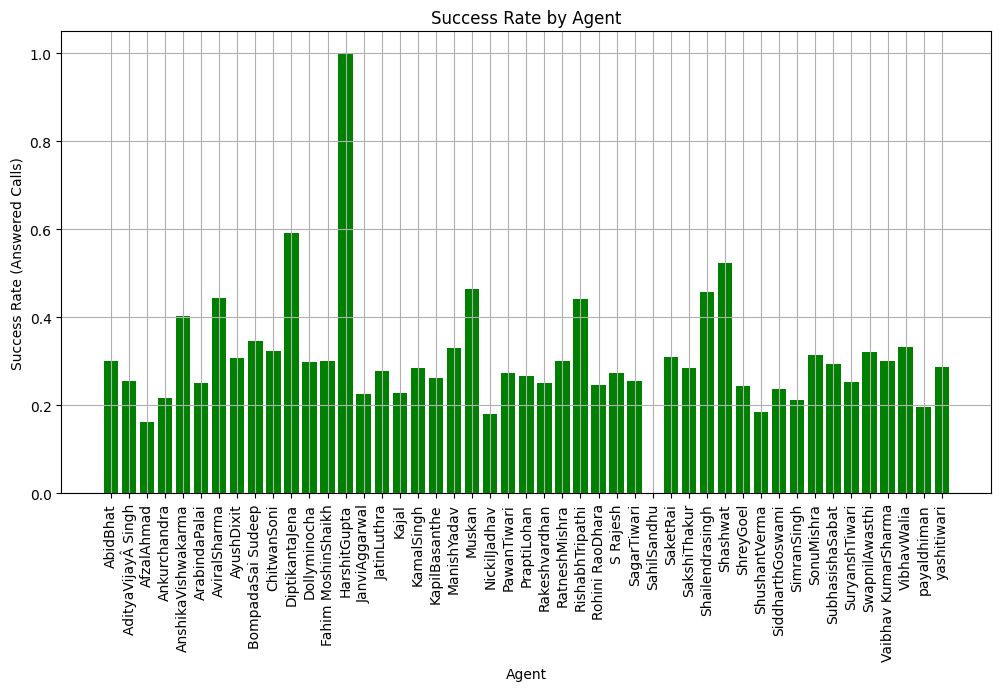

In [ ]:
# Aggregate metrics for each agent
agent_performance = phone_metrics_df.groupby('calls_done_by').agg({
    'call_duration_sec': ['mean', 'sum', 'count'],
    'lead_score': 'mean',
    'status': lambda x: (x == 'Answered').sum() / x.count()
}).reset_index()

# Flatten multi-level columns
agent_performance.columns = ['calls_done_by', 'avg_call_duration_sec', 'total_call_duration_sec', 'total_calls', 'avg_lead_score', 'success_rate']
plt.figure(figsize=(12, 6))
plt.bar(agent_performance['calls_done_by'], agent_performance['avg_call_duration_sec'])
plt.xlabel('Agent')
plt.ylabel('Average Call Duration (seconds)')
plt.title('Average Call Duration by Agent')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(agent_performance['calls_done_by'], agent_performance['success_rate'], color='green')
plt.xlabel('Agent')
plt.ylabel('Success Rate (Answered Calls)')
plt.title('Success Rate by Agent')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

Insight - 
Sales Team Performance: Analyzing each sales team member's success rate and average call duration reveals the top performers. Members with higher success rates and longer average call durations are excelling in both engagement and outcomes, indicating their strong contribution to the team's overall success.

Key Insights
- Optimal Call Timing: The best time to call, based on both average call duration and success rate, is between 8 AM and 9 PM.
- Lead Distribution: The majority of leads are from the New Inquiry stage.
- Outbound Call Follow-Up: There is a lack of follow-up for candidates marked as Follow-Up Required in outbound calls.
- Performance by Squad and Role: Squad 3 excels in managing call durations, while the highest number of outbound calls are made by an individual.
- Regional Performance: Hyderabad is most effective in progressing candidates to the final stage, which is payment completed.
- Roles in Call Management: Both Team Leads and Agents are heavily involved in building connections and making a high volume of calls.

In [ ]:
excel_filename = 'Cleanphone_metrics.xlsx'
phone_metrics_df.to_excel(excel_filename, index=False)